In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots # 畫圖
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

In [3]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [4]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Boston['medv'],
                                test_size=0.3,
                                random_state=0)

In [5]:
bag_boston = RF(max_features=X_train.shape[1], random_state=0) #Bootstrap 抽樣有隨機性，設定 seed 使結果固定
bag_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=0)

畫圖: 可參考課本 Section 2.3.4 (page 48)

14.634700151315787

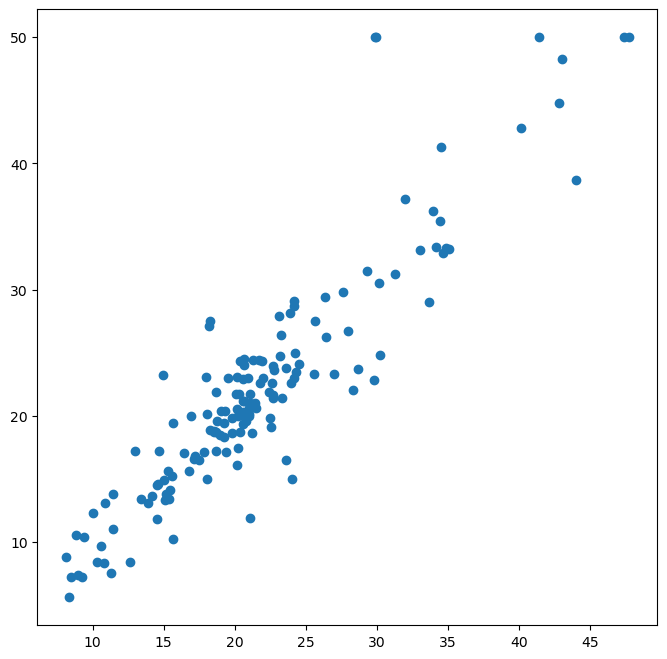

In [6]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test) #計算 test set 的預測值
ax.scatter(y_hat_bag, y_test) #scatter plot (散步圖)
np.mean((y_test - y_hat_bag)**2) #預測誤差平方和

In [8]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=500, #number of trees, default = 100
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.605662565263161

用 Bagging 方法，100 個 bootstrap sample(trees) 與 500 個 bootstrap samples (trees) 相比，預測誤差平方和 (Square error loss) 差別不大 (14.63 vs 14.61)

In [9]:
RF_boston = RF(max_features=6, # 共 12 個變數，random forest 只用一半的變數
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

20.04276446710527

random forest 表現比 bagging 差。

In [12]:
feature_imp = pd.DataFrame(
    {'importance':RF_boston.feature_importances_}, #抓出結果的 feature_importances_
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False) #排序

,importance
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784
